In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/Princee Kabra/Downloads/datasets_4458_8204_winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [7]:
print(y_train.shape)

(1279,)


In [8]:
print(x_train.shape)

(1279, 11)


In [9]:
print(x_test.shape)

(320, 11)


In [10]:
print(y_test.shape)

(320,)


In [11]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)


In [12]:
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
y_pred=classifier.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.64375

In [15]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df1=df.head(25)

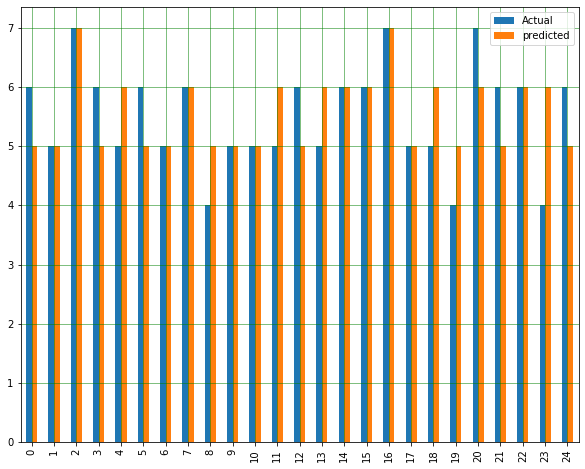

In [16]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [17]:
bins=[2,6,8]
group_names=['bad','good']
data['quality']=pd.cut(data['quality'],bins=bins,labels=group_names)


In [18]:
print(data['quality'])

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]


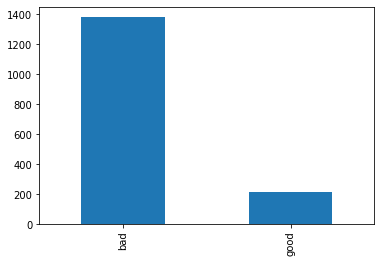

In [19]:
data['quality'].value_counts().plot(kind='bar')
